# Kaggle - nivel 2

## Cross Validation y Ajuste de los parámetros

seguimos con la competición Titanic Challenge visto en el punto 1

- v1.1_052020
- author and contact: [marcusRB](https://www.linkedin.com/in/marcusrb)
- [Kaggle - Titanic challenge](https://www.kaggle.com/c/titanic/)

## Check the versions of libraries

In [1]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.3 | packaged by conda-forge | (default, Jul  1 2019, 21:52:21) 
[GCC 7.3.0]
scipy: 1.4.1
numpy: 1.17.2
matplotlib: 3.2.1
pandas: 1.0.3
sklearn: 0.22.2.post1


***

## Import Libraries

In [31]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# data mining
#from sklearn.impute import KNNImputer, MissingIndicator, SimpleImputer
from sklearn import impute
#from sklearn_pandas import categorical_imputer, CategoricalImputer
from sklearn.pipeline import make_pipeline, make_union
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# machine learning
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE, rfe
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Save the model
import pickle
import joblib


## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

***

## Carga ficheros anteriores

In [3]:
# Carga de los ficheros anteriores ya preprocesados - cambiar la ruta según vuestro directorio o raíz
train_titanic = pd.read_csv('train_feat.csv')
test_titanic = pd.read_csv('test_feat.csv')

In [4]:
train_titanic.head(10)

,Survived,Sex,SibSp,Parch,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,Pclass_3,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,RoomGroup_r1,RoomGroup_r2,RoomGroup_r3,RoomGroup_r4
0,0,True,0.432793,-0.473674,0.059160,0,False,0,0,1,...,0,0,0,0,0,1,1,0,0,0
1,1,False,0.432793,-0.473674,0.059160,0,True,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,False,-0.474545,-0.473674,-0.560975,1,False,0,0,1,...,0,0,0,0,0,1,1,0,0,0
3,1,False,0.432793,-0.473674,0.059160,0,True,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,True,-0.474545,-0.473674,-0.560975,1,False,0,0,1,...,0,0,0,0,0,1,1,0,0,0
5,0,True,-0.474545,-0.473674,-0.560975,1,False,0,0,1,...,0,0,0,0,0,1,1,0,0,0
6,0,True,-0.474545,-0.473674,-0.560975,1,True,1,0,0,...,0,0,1,0,0,0,1,0,0,0
7,0,True,2.247470,0.767630,1.919564,0,False,0,0,1,...,0,0,0,0,0,1,1,0,0,0
8,1,False,-0.474545,2.008933,0.679295,0,False,0,0,1,...,0,0,0,0,0,1,1,0,0,0
9,1,False,0.432793,-0.473674,0.059160,0,False,0,1,0,...,0,0,0,0,0,1,1,0,0,0


In [5]:
test_titanic.head(10)

,Sex,SibSp,Parch,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,RoomGroup_r1,RoomGroup_r2,RoomGroup_r3,RoomGroup_r4
0,True,-0.499470,-0.400248,-0.553443,1,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
1,False,0.616992,-0.400248,0.105643,0,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
2,True,-0.499470,-0.400248,-0.553443,1,False,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,True,-0.499470,-0.400248,-0.553443,1,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
4,False,0.616992,0.619896,0.764728,0,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
5,True,-0.499470,-0.400248,-0.553443,1,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
6,False,-0.499470,-0.400248,-0.553443,1,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
7,True,0.616992,0.619896,0.764728,0,False,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
8,False,-0.499470,-0.400248,-0.553443,1,False,0,0,1,1,...,0,0,0,0,0,1,1,0,0,0
9,True,1.733455,-0.400248,0.764728,0,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


* * *

### Training and Validation dataset

cargamos el resto de columnas

In [6]:
id = pd.read_csv('test.csv')
PassengerId = id['PassengerId']

In [7]:
PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [8]:
## Columnas de nuestro estudio de correlaciones
cols = pd.read_pickle('cols_feat.pkl')
cols

0    Index(['Title_Mrs', 'Title_Miss', 'InCabin', '...
1    [Sex, SibSp, FamilySize, IsAlone, InCabin, Pcl...
2    [Sex, SibSp, FamilySize, IsAlone, InCabin, Pcl...
3    [Sex, SibSp, Parch, FamilySize, IsAlone, InCab...
4    [Sex, FamilySize, InCabin, Pclass_3, FareGroup...
dtype: object

In [9]:
features = ['cols15', 'colsRNK10', 'colsRNK15', 'colsRNK20', 'colsSPT']
cols15 = cols[0]
colsRNK10 = cols[1]
colsRNK15 = cols[2]
colsRNK20 = cols[3]
colsSPT = cols[4]

In [10]:
cols15

Index(['Title_Mrs', 'Title_Miss', 'InCabin', 'Pclass_1', 'FareGroup_D',
       'Deck_B', 'Embarked_C', 'FamilySize', 'Deck_D', 'AgeGroup_Baby',
       'Deck_E', 'Parch', 'Deck_C', 'RoomGroup_r4', 'Pclass_2'],
      dtype='object')

* * *

## Train and Test data

Dividimos los datos en dos conjuntos, de entrenamiento y de test. Con el conjunto de entrenamiento crearemos el modelo predictivo, y con el de test, lo evaluaremos para ver qué rendimiento tiene.

* * * 
## - Predictive Modeling - 

[Classification](https://en.wikipedia.org/wiki/Statistical_classification) problems are one of the most common in machine learning. This is [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning), that is, algorithms that, based on a set of tagged data, generalize a model that makes the most accurate prediction of the tag in a new set of data of the same type.

In this activity we will focus on showing different measures that we can use to evaluate a classification model.

### Cross Validation
https://es.wikipedia.org/wiki/Validaci%C3%B3n_cruzada

La validación cruzada o cross-validation es una técnica utilizada para evaluar los resultados de un análisis estadístico y garantizar que son independientes de la partición entre datos de entrenamiento y prueba. Consiste en repetir y calcular la media aritmética obtenida de las medidas de evaluación sobre diferentes particiones. Se utiliza en entornos donde el objetivo principal es la predicción y se quiere estimar la precisión de un modelo que se llevará a cabo a la práctica.1​ Es una técnica muy utilizada en proyectos de inteligencia artificial para validar modelos generados.


#### Objetivo de la validación cruzada
Suponemos que tenemos un modelo con uno o más parámetros de ajuste desconocidos y unos datos de entrenamiento que queremos analizar. El proceso de ajuste optimiza los parámetros del modelo para que éste se ajuste a los datos de entrenamiento tan bien como pueda. Si tomamos una muestra independiente como dato de prueba (validación), del mismo grupo que los datos de entrenamiento, normalmente el modelo no se ajustará a los datos de prueba igual de bien que a los datos de entrenamiento. Esto se denomina sobreajuste y acostumbra a pasar cuando el tamaño de los datos de entrenamiento es pequeño o cuando el número de parámetros del modelo es grande. La validación cruzada es una manera de predecir el ajuste de un modelo a un hipotético conjunto de datos de prueba cuando no disponemos del conjunto explícito de datos de prueba.


Ahora que ya tenemos el conjunto de datos preparado para el análisis, crearemos diferentes modelos de predicción y los compararemos. Los modelos que crearemod seran los siguientes:

- Logistic Regression
- Decision Tree
- Random Forest
- Boosting
- MultiLayer Perceptron
- SVC
- LDA

Los evaluaremos con la métrica del área debajo de la curva ROC del modelo de predicción respecto los resultados, y escojeremos aquel modelo que tenga mejor resultado.

### `cols15`

In [11]:
# Split and drop Survived variable
X_ = train_titanic[cols15]
Y_ = train_titanic['Survived']

# Create train and test 80-20 with seed fixed to 42
X_train, X_test, y_train, y_test = train_test_split(X_, Y_, test_size=0.20, random_state=42)
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [12]:
X_train.head()

,Title_Mrs,Title_Miss,InCabin,Pclass_1,FareGroup_D,Deck_B,Embarked_C,FamilySize,Deck_D,AgeGroup_Baby,Deck_E,Parch,Deck_C,RoomGroup_r4,Pclass_2
331,0,0,True,1,0,0,0,-0.560975,0,0,0,-0.473674,1,1,0
733,0,0,False,0,0,0,0,-0.560975,0,0,0,-0.473674,0,0,1
382,0,0,False,0,0,0,0,-0.560975,0,0,0,-0.473674,0,0,0
704,0,0,False,0,0,0,0,0.059160,0,0,0,-0.473674,0,0,0
813,0,1,False,0,1,0,0,3.159833,0,0,0,2.008933,0,0,0


In [13]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [14]:
X_test.head()

,Title_Mrs,Title_Miss,InCabin,Pclass_1,FareGroup_D,Deck_B,Embarked_C,FamilySize,Deck_D,AgeGroup_Baby,Deck_E,Parch,Deck_C,RoomGroup_r4,Pclass_2
709,0,0,False,0,0,0,1,0.679295,0,0,0,0.767630,0,0,0
439,0,0,False,0,0,0,0,-0.560975,0,0,0,-0.473674,0,0,1
840,0,0,False,0,0,0,0,-0.560975,0,0,0,-0.473674,0,0,0
720,0,1,False,0,1,0,0,0.059160,0,0,0,0.767630,0,0,1
39,0,1,False,0,0,0,1,0.059160,0,0,0,-0.473674,0,0,0


In [15]:
y_test.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

## Cross Validation KFold parte 1

Vamos a visualizar primero las puntuaciones de algunos de los modelos.
Definimos con la librería StratifiedKFold en número de split y asignamos a este estimador unos modelos con los valores por defecto.

In [16]:
# Create a performance_auc dict
performance_auc = {}
# Cross validate model with Kfold stratified cross val
K_fold = StratifiedKFold(n_splits=10)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=4)]: Done  10 out of  1

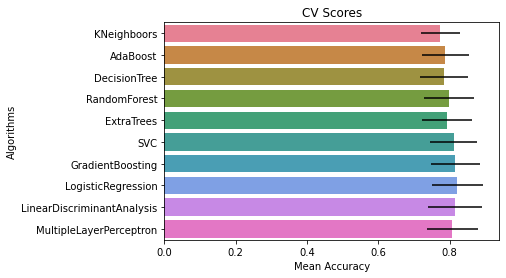

In [17]:
# Modeling step Test differents algorithms 
random_state = 42

models = [] # append all models or predictive models 
cv_results = [] # cross validation result
cv_means = [] # cross validation mean value
cv_std = [] # cross validation standard deviation

# Realizamos esta primera parte con los valores por defecto
models.append(KNeighborsClassifier())
models.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
models.append(DecisionTreeClassifier(random_state=random_state))
models.append(RandomForestClassifier(random_state=random_state))
models.append(ExtraTreesClassifier(random_state=random_state))
models.append(SVC(random_state=random_state))
models.append(GradientBoostingClassifier(random_state=random_state))
models.append(LogisticRegression(random_state = random_state))
models.append(LinearDiscriminantAnalysis())
models.append(MLPClassifier(random_state=random_state))

# Los modelos serán entrenados a través de 4 jobs, random_state = 42 y seleccionamos verbose = 1
for model in models :
    cv_results.append(cross_val_score(model, X_train, y_train, 
                                      scoring = "accuracy", 
                                      cv = K_fold, 
                                      n_jobs=4,
                                      verbose=1))

# Los promedios y la desviación estándar serán nuestros resultados a mostrar
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means,
        "CrossValErrors": cv_std,
        "Algorithms":[
                     "KNeighboors",
                     "AdaBoost", 
                     "DecisionTree",   
                     "RandomForest",
                     "ExtraTrees",
                     "SVC",
                     "GradientBoosting",                      
                     "LogisticRegression",
                     "LinearDiscriminantAnalysis",
                     "MultipleLayerPerceptron"]
    })

cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,
                palette="husl", orient = "h", **{'xerr':cv_std})

cv_plot.set_xlabel("Mean Accuracy")
cv_plot = cv_plot.set_title("CV Scores")

In [32]:
# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=1234), 
               GaussianNB(), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

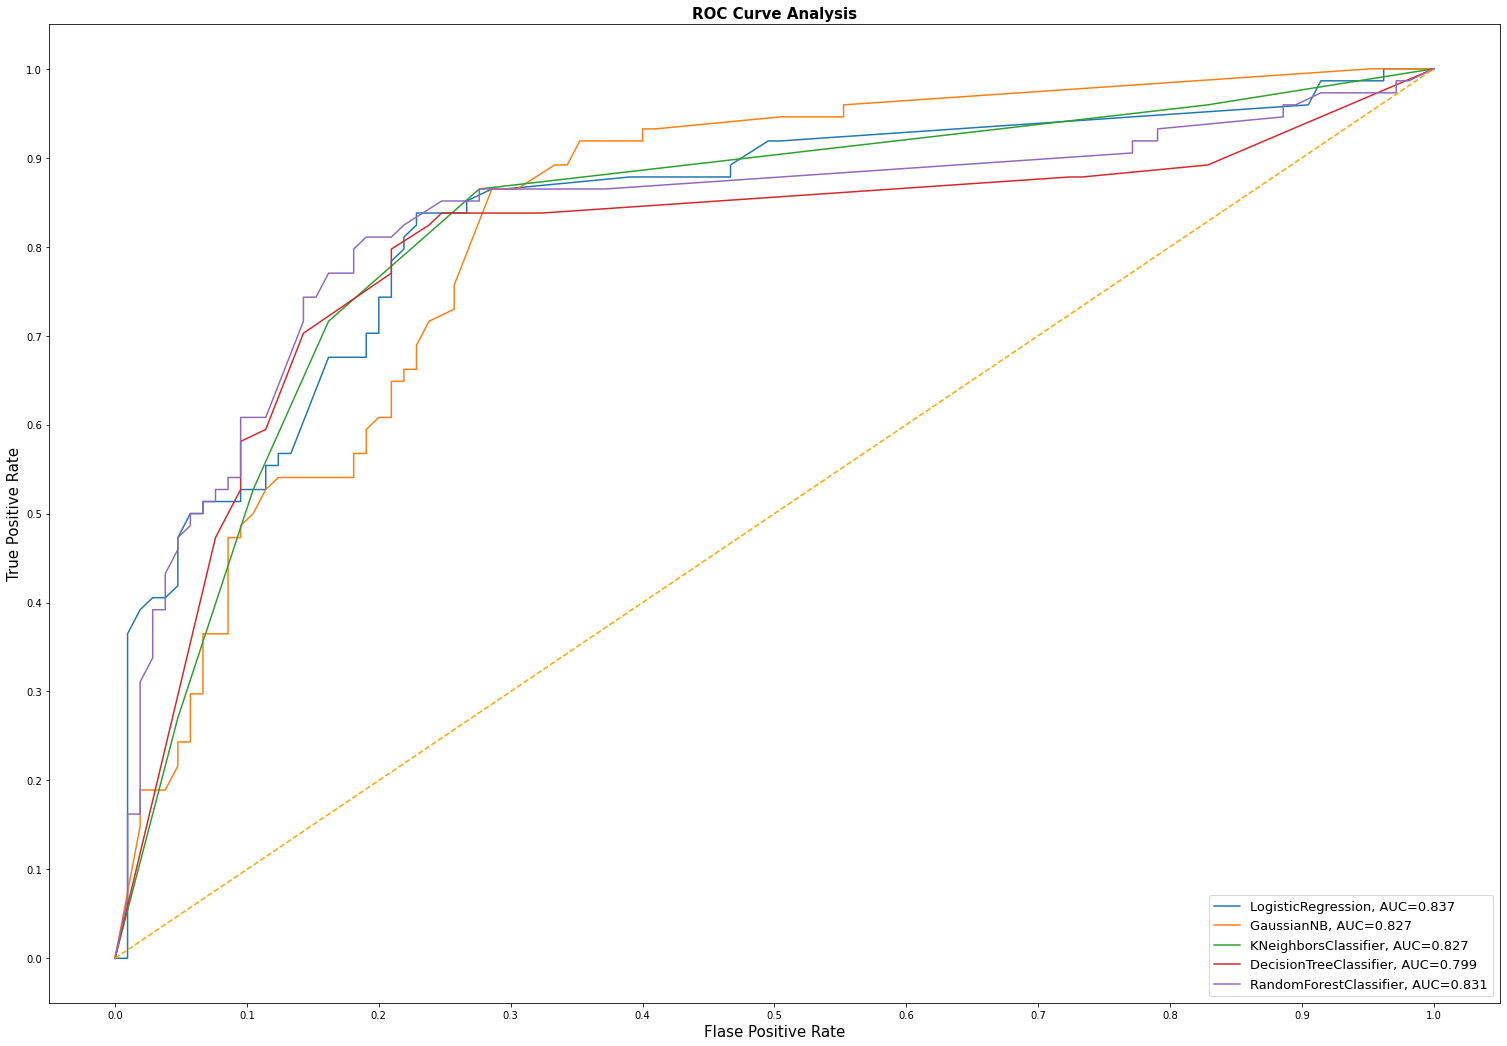

In [35]:
fig = plt.figure(figsize=(26,18))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [ ]:
fig.savefig('multiple_roc_curve.png')

Los resultados mostrados nos indica que el SVC y GB son lo que mejor resultados nos proporciona el modelo.

## Validación del modelo

Realizamos la operación manual pero primero visualizando el modelo con los parámetros por defecto, seguido por el modelo con los valores ajustados.

### Gradient Boosting Classifier

In [41]:
# GBC Classifier
GBC_Model = GradientBoostingClassifier()

scores = cross_val_score(GBC_Model, X_train, y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.84722222 0.76388889 0.74647887 0.94366197 0.85915493 0.76056338
 0.77464789 0.8028169  0.73239437 0.91549296]


81.46

In [42]:
# Predicción
pred_GBC_1 = cross_val_predict(GBC_Model, X_test, y_test, cv = K_fold,
                               n_jobs = 4, verbose = 1, method='predict')
print(classification_report(y_test, pred_GBC_1))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


              precision    recall  f1-score   support

           0       0.75      0.76      0.75       105
           1       0.65      0.64      0.64        74

    accuracy                           0.71       179
   macro avg       0.70      0.70      0.70       179
weighted avg       0.71      0.71      0.71       179



[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.6s finished


In [43]:
# Gradient boosting tunning
GBC = GradientBoostingClassifier()
gb_param_grid = {
              'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01, 0.001],
              'max_depth': [4, 8, 16],
              'min_samples_leaf': [100,150,250],
              'max_features': [0.3, 0.1]
              }

gsGBC = GridSearchCV(GBC, param_grid = gb_param_grid, cv=K_fold, 
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    4.5s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   21.2s
[Parallel(n_jobs=4)]: Done 876 tasks      | elapsed:   50.3s
[Parallel(n_jobs=4)]: Done 1576 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 2160 out of 2160 | elapsed:  2.0min finished


0.747300469483568

In [44]:
pred_GBC_2 = gsGBC.predict(X_test)
print(classification_report(y_test, pred_GBC_2))

              precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



<module 'matplotlib.pyplot' from '/home/jovyan/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

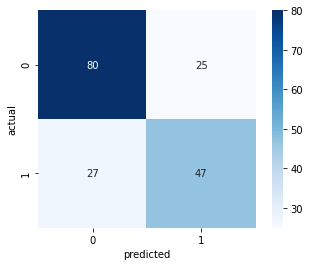

In [45]:
plt.subplot()

matrix = confusion_matrix(y_test, pred_GBC_1)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

<module 'matplotlib.pyplot' from '/home/jovyan/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

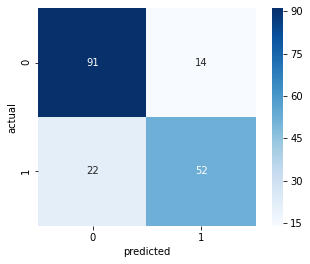

In [46]:
plt.subplot()

matrix = confusion_matrix(y_test, pred_GBC_2)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

In [47]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, pred_GBC_1)
roc_auc1 = auc(fpr, tpr)
performance_auc['GB_1'] = roc_auc1

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

TypeError: 'numpy.float64' object is not callable

In [ ]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, pred_GBC_2)
roc_auc2 = auc(fpr, tpr)
performance_auc['GB_2'] = roc_auc2

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Linear Discriminant Analysis


In [48]:
# Linear Discriminant Analysis 
LDA_Model= LinearDiscriminantAnalysis()

scores = cross_val_score(LDA_Model, X_train, y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.875      0.76388889 0.71830986 0.92957746 0.88732394 0.74647887
 0.74647887 0.8028169  0.76056338 0.91549296]


81.46

In [49]:
# Linear Discriminant Analysis - Parameter Tuning
LDA = LinearDiscriminantAnalysis()

## Search grid for optimal parameters
lda_param_grid = {"solver" : ["svd"],
              "tol" : [0.0001,0.0002,0.0003]}


gsLDA = GridSearchCV(LDA, param_grid = lda_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLDA.fit(X_train,y_train)
LDA_best = gsLDA.best_estimator_

# Best score
gsLDA.best_score_

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.2s finished


0.8145931142410016

In [ ]:
# Plot Confusion Matrix

In [ ]:
# Plot ROC Curve

### Logistic Regression

In [50]:
# Logistic Regression
#
Log_Model = LogisticRegression(C=1)
scores = cross_val_score(Log_Model, X_train, y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.875      0.76388889 0.73239437 0.92957746 0.88732394 0.74647887
 0.76056338 0.8028169  0.78873239 0.92957746]


82.16

In [51]:
# LogisticRegression Parameters tunning 
LRM = LogisticRegression()

## Search grid for optimal parameters
lr_param_grid = {"penalty" : ["l2"],
              "tol" : [0.0001,0.0002,0.0003],
              "max_iter": [100,200,300],
              "C" :[0.01, 0.1, 1, 10, 100],
              "intercept_scaling": [1, 2, 3, 4],
              "solver":['liblinear'],
              "verbose":[1]}


gsLRM = GridSearchCV(LRM, param_grid = lr_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLRM.fit(X_train, y_train)
LRM_best = gsLRM.best_estimator_

# Best score
gsLRM.best_score_

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 712 tasks      | elapsed:    3.7s


[LibLinear]

[Parallel(n_jobs=4)]: Done 1800 out of 1800 | elapsed:    9.0s finished


0.8216353677621283

In [ ]:
# Plot Confusion Matrix

In [ ]:
# Plot ROC Curve

### Random Forest Classifier

In [52]:
# Random Forest Classifier Model
#
RFC_model = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(RFC_model, X_train, y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.84722222 0.69444444 0.74647887 0.88732394 0.8028169  0.76056338
 0.71830986 0.74647887 0.76056338 0.87323944]


78.37

In [53]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC, param_grid = rf_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train, y_train)
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   55.4s
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:  1.7min finished


0.8188380281690142

### Support Vector Machine Classifier

In [54]:
# Support Vector Machine
SVM_Model = SVC()

scores = cross_val_score(SVM_Model, X_train, y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.86111111 0.75       0.77464789 0.94366197 0.83098592 0.76056338
 0.76056338 0.78873239 0.74647887 0.90140845]


81.18

In [55]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100, 200, 300]}

gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = K_fold,
                      scoring="accuracy", n_jobs= -1, verbose = 1)

gsSVMC.fit(X_train, y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   15.1s finished


0.8173904538341157

* * *
## Ensemble modeling <a class="anchor" id="14-bullet"></a>
<hr>

The another way to fine-tune our system is to try to combine the models that perform best. The goup will often perform better than the best individual model, especially if the individual models make very different types of errors.

Building a model on top of many other models are called Ensemble Learning. And it is often a great way to push ML algorithm even further.

I used **voting classifier** to combine the predictions coming from the 5 classifiers. I preferred to pass the argument `soft` to the voting parameter to take into account the probability of each vote.

In [56]:
## With 3 algorithms 
# RNK5 = 83.85

VotingPredictor_1 = VotingClassifier(estimators =
                           [('rfc', RFC_best), 
                            ('gbc', GBC_best),
                           ('svc', SVMC_best)],
                           voting='soft', n_jobs = 4)

VotingPredictor_1 = VotingPredictor_1.fit(X_train, y_train)

scores = cross_val_score(VotingPredictor_1, X_train, y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
print(round(np.mean(scores)*100, 2))

[0.86111111 0.76388889 0.74647887 0.95774648 0.85915493 0.76056338
 0.76056338 0.78873239 0.74647887 0.90140845]
81.46


In [57]:
predicted_vp1 = VotingPredictor_1.predict(X_test)
print(classification_report(y_test, predicted_vp1))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [58]:
## With 5 algorithms
# RNK5 = 83.57
VotingPredictor_2 = VotingClassifier(estimators =
                           [ ('rfc', RFC_best), 
                            ('svc', SVMC_best),                             
                            ('gbc', GBC_best),
                            ('lda', LDA_best),
                            ('lrm', LRM_best)],                            
                    voting='soft', n_jobs = 4)

VotingPredictor_2 = VotingPredictor_2.fit(X_train, y_train)

scores = cross_val_score(VotingPredictor_2, X_train, y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
print(round(np.mean(scores)*100, 2))

[0.875      0.76388889 0.76056338 0.94366197 0.87323944 0.77464789
 0.76056338 0.78873239 0.76056338 0.90140845]
82.02


In [59]:
predicted_vp2 = VotingPredictor_2.predict(X_test)
print(classification_report(y_test, predicted_vp2))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



## Conclusion and Model Evaluation

Después de aplicar diferentes modelos de clasificación, y viendo que no hay demasiadas diferencias de rendimiento entre ellos, el que mejor resultado nos ha dado con la métrica que hemos escogido ha sido el de Support Vector Machines.

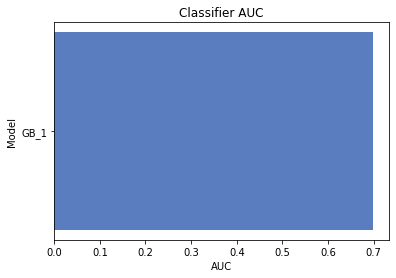

In [60]:
perf = pd.DataFrame.from_dict(performance_auc, orient='index')
perf['Model'] = perf.index
perf['AUC'] = perf[0]
plt.xlabel('AUC')
plt.title('Classifier AUC')
sns.set_color_codes("muted")
sns.barplot(x='AUC', y='Model', data=perf, color="b")

## Kaggle Submission

### Validation with Ensemble1 Cols15

In [64]:
# Testing with SVC
X_val = test_titanic[cols15]
VotingPredictor_1 = VotingPredictor_1.predict(X_val)
VotingPredictor_1

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [65]:
len(VotingPredictor_1)

418

In [66]:
# We submit predicted random forest results
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": VotingPredictor_1
    })
submission.to_csv('submission_VP1.csv', index=False)

## Kaggle Submission

In [67]:
!kaggle competitions submit titanic -f submission_VP1.csv -m "VP1 cols15"

100%|████████████████████████████████████████| 2.77k/2.77k [00:04<00:00, 603B/s]
Successfully submitted to Titanic: Machine Learning from Disaster

In [68]:
!kaggle competitions submissions titanic

fileName                         date                 description                        status    publicScore  privateScore  
-------------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_VP1.csv               2020-05-05 13:59:49  VP1 cols15                         complete  0.78947      None          
submission-simple-cleansing.csv  2020-05-05 09:27:50  keras example                      complete  0.75598      None          
evaluation_submission_nn.csv     2020-05-04 19:04:51  submit NN results                  complete  0.26794      None          
gender_submission.csv            2020-05-04 17:55:11  test gender submission             complete  0.76555      None          
submission_DT.csv                2020-04-16 11:05:18  DecisionTree colsRNK10             complete  0.76555      None          
submission_VP1.csv               2020-04-12 18:35:01  VP1 colsRNK5                       complete  0.78947     

Puedes probar con el otras columnas / features y realizar pruebas con Cross-Validation y ajuste de los parámetros.